## Scikit-Learn course

https://inria.github.io/scikit-learn-mooc/overfit/overfit_module_intro.html

In [28]:
import pandas as pd

# pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector as selector, ColumnTransformer

# pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

## Predictive Pipeline

Goals - Play with a basic processing / fit / predict pipeline on heterogeneous tabular data

In [3]:
adult_census = pd.read_csv("../data/adult_census.csv")

In [4]:
adult_census.head(3)

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [19]:
X = adult_census.drop(columns="class")
y = adult_census["class"]

### Preprocessing

In [21]:
# defining column types
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

# applying separate processing
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

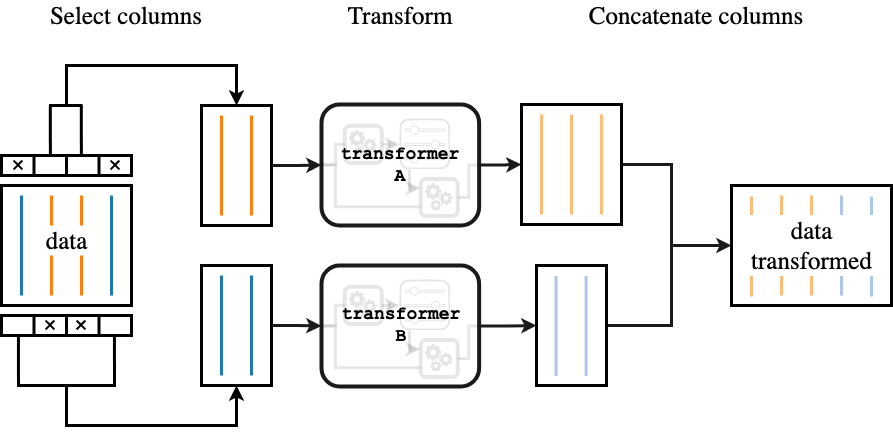

### Fitting and Evaluation

In [22]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [23]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['id', 'age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [24]:
cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([1.01834226, 0.86717534, 0.79164124, 0.810817  , 0.75997901]),
 'score_time': array([0.03099489, 0.0294888 , 0.02806282, 0.0390439 , 0.0321641 ]),
 'test_score': array([0.85146893, 0.85044529, 0.84930385, 0.8527846 , 0.85647011])}

In [25]:
cv_results["test_score"].mean(), cv_results["test_score"].std()

(0.8520945554009328, 0.0024706738548830884)

**Ensemble model**

In [29]:
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [30]:
cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([0.85348988, 0.74407601, 0.94852805, 0.98326516, 0.67939091]),
 'score_time': array([0.05292702, 0.04531932, 0.04526806, 0.05619001, 0.05180693]),
 'test_score': array([0.83120074, 0.87183949, 0.871724  , 0.87387387, 0.81111794])}

In [31]:
cv_results["test_score"].mean(), cv_results["test_score"].std()

(0.8519512072025123, 0.025942430273477594)

## Selecting best model

Goals - 

## Tuning Hyperparameters

Goals - 

## Linear Models

Goals - 

## Decision Tree Models

Goals - 

## Ensemble

Goals - 

## Evaluating Model Performance

Goals - 